# Chapter 4 : Model training

## 4.1 선형회귀

x 값에 의해서 종속적으로 변화는 y를 선형적 관계를 모델링 하는것 ! 단순선형회귀 분석, 다중선형회기 분석으로 분류

Y = wx +b

w : Weight
b : Bias

Training을 통해 최적 w, b를 찾는것

### "모델 데이터를 기반으로 Value를 예측하는것" 

Text(0, 0.5, 'y')

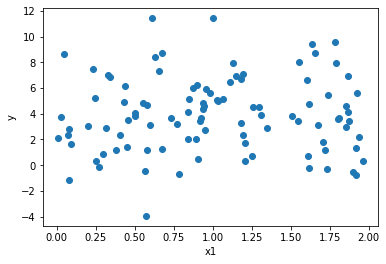

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(100,1)
y = 4+3*np.random.randn(100,1)
plt.scatter(x,y); plt.xlabel("x1"); plt.ylabel("y")


In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

lin_reg.intercept_,lin_reg.coef_

(array([3.72935292]), array([[0.19977031]]))

In [13]:
X_new=np.array([[0],[2]])
lin_reg.predict(X_new)

array([[3.72935292],
       [4.12889354]])

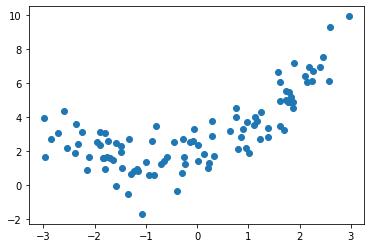

In [15]:
## 다항회귀

m= 100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

plt.scatter(x,y)


In [16]:
## plolynomnialfeatures

from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(x)
x[0]

array([2.46310118])

In [17]:
X_poly[0]

array([2.46310118, 6.06686744])

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.8146454]), array([[0.98022407, 0.513751  ]]))

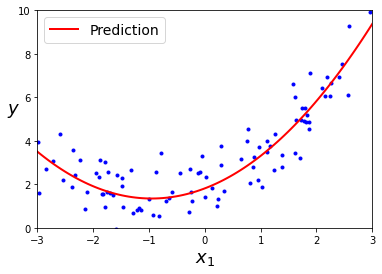

In [31]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)  #
y_new = lin_reg.predict(X_new_poly)          # 예측값 만드는 과정
plt.plot(x,y,'b.')
plt.plot(X_new,y_new,"r-",linewidth=2,label="Prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


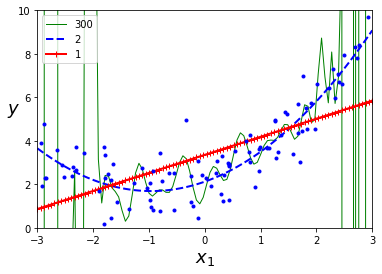

In [48]:
## 고차 다항식으로 확장 할때 !!!

m= 100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)
X_new=np.linspace(-3,3,100).reshape(100,1)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-",1,300),("b--",2,2),("r-+",2,1)):
    polybig_feature = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    Polynomial_regression = Pipeline([("poly_features",polybig_feature), ("std_scaler",std_scaler),("lin_reg",lin_reg)])
    Polynomial_regression.fit(x,y)
    y_newbig = Polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree),linewidth=width)


plt.plot(x,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
    

### 학습곡선 생성

In [71]:
from cProfile import label
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict=model.predict(x_train[:m])
        y_val_predict=model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2, label="Trainning")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3, label="Validation")
    plt.legend(loc="upper left")

(0.0, 2.0)

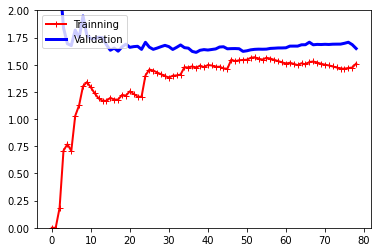

In [74]:
lin_reg=LinearRegression()
plot_learning_curve(lin_reg,x,y)
plt.ylim(0,2)


### 편향/분산 트레이드 오프

머신러닝에 모델 일반화의 오차는 3가지 형태의 오차의 합으로 표현 가능

1. 편향 : 데이터의 형태는 2차인데 실제로 1차로 가정한 경우 ( 과소 접합 문제 발생)
2. 분산 : 고차 다항모델의 경우 높은 분사는 가지기 쉬어 과대접합
3. 줄일수 없는 오차 : 외부 노이즈에 대한 영항  





## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지 회귀  
  -  규제항은 훈련하는 동안 비용 함수에 추가
  - 


In [80]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[4.60042771]])

In [ ]:
sgd_reg=sg

## 4.6 Rogistic regression

- Linear regression 회귀 모델과 다르게 결과값 출력이 아닌 Rogistic 출력
- 로지스틱은 0과 1사이 값을 출력하는 시그모이드 함수 


### 4.6.2 훈련 비용 함수



### 4.6.3 결정 경계

In [8]:
# 꽃입 너비 기반 종분류 알고리즘 제작

from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [9]:
x=iris["data"][:,3:] #  꽃잎 너비
y=(iris["target"]==2).astype(np.int)  # 1 iris-virginica 1 not 0

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37892\4154351711.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=(iris["target"]==2).astype(np.int)


In [10]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()